In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
y = pd.read_csv(filepath_or_buffer='BDSYall.txt', sep = '\t')
y = y.drop('Unnamed: 0', axis =1 )

In [3]:
best = y[['Best_T']]

In [77]:
data = best.value_counts().sort_index(ascending= False)

In [78]:
data

Best_T
28         3
27         9
26        14
25        17
24        17
23        13
22        10
21        14
20        11
19         8
18        14
17         7
16        11
15         4
14         2
13         1
10         1
9          1
8          1
dtype: int64

In [79]:
lista_best = []
lista_ocorr = []
c = 0
for n in range(len(data.index)):
    lista_best.append(str(data.index[n][0]))
    lista_ocorr.append(data.iloc[n])
    c+=data.iloc[n]
    
    #print("Para Best_T = ",data.index[n][0], "tem-se ", data.iloc[n]," resultados")
    


In [80]:
lista_best 

['28',
 '27',
 '26',
 '25',
 '24',
 '23',
 '22',
 '21',
 '20',
 '19',
 '18',
 '17',
 '16',
 '15',
 '14',
 '13',
 '10',
 '9',
 '8']

In [81]:
lista_ocorr

[3, 9, 14, 17, 17, 13, 10, 14, 11, 8, 14, 7, 11, 4, 2, 1, 1, 1, 1]

In [82]:
import matplotlib
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

Text(0.5, 0, 'Mini-BESTest Grade')

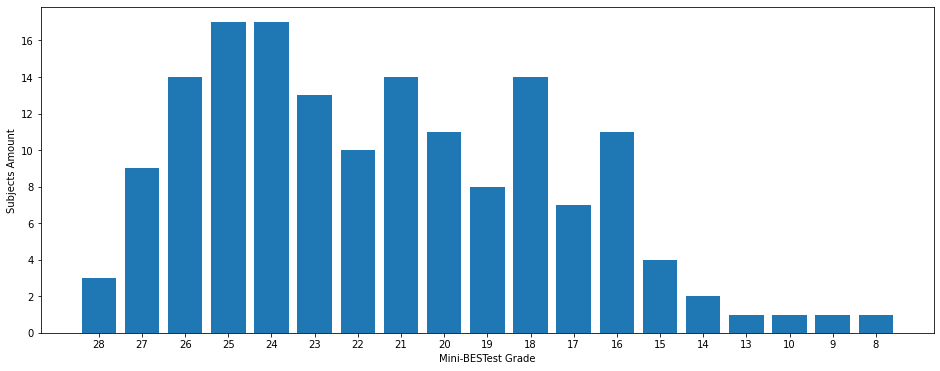

In [167]:
fig, axs = plt.subplots(figsize=(16, 6))
axs.bar(lista_best, lista_ocorr)
axs.set_ylabel("Subjects Amount")
axs.set_xlabel("Mini-BESTest Grade")

In [84]:
fig.savefig("histograma geral Best.pdf")

In [85]:
# função que retorna o modelo de entrada a ser usada
def preset(x,y, r = False, median = None, cluster= None):
    Y = y.copy()
    
    if r:
        X = x.iloc[:,:1127]
    else:
        X = x.iloc[:,:127]
    
    if median == 'above':
        below=[]
        for n in range(len(y)):
            if y.iloc[n,:]['Best_A'] != 1:
                below.append(n)
        X = X.drop(below)
        X = X.reindex()
        Y = Y.drop(below)
        Y = Y.reindex()
        
        return X,Y
    
    elif median == 'below':
        above = []
        for n in range(len(y)):
            if y.iloc[n,:]['Best_B'] != 1:
                above.append(n)
        X = X.drop(above)
        X = X.reindex()
        Y = Y.drop(above)
        Y = Y.reindex()
        
        return X,Y
    
    if cluster== 'a':
        b=[]
        for n in range(len(y)):
            if x.iloc[n,:]['cluster'] != 1:
                b.append(n)
        
        X = X.drop(b)
        X = X.reindex()
        Y = Y.drop(b)
        Y = Y.reindex()
        
        return X,Y
        
    elif cluster== 'b':
        a=[]
        for n in range(len(y)):
            if x.iloc[n,:]['cluster'] != 0:
                a.append(n)
        
        X = X.drop(a)
        X = X.reindex()
        Y = Y.drop(a)
        Y = Y.reindex()
        
        return X,Y
    
    return X,Y
        

In [86]:
x = pd.read_csv(filepath_or_buffer='BDSX.txt', sep = '\t')
x = x.drop('Unnamed: 0', axis =1 )
y = pd.read_csv(filepath_or_buffer='BDSYall.txt', sep = '\t')
y = y.drop('Unnamed: 0', axis =1 )

In [87]:
Xb,Yb = preset(x,y, r = False, median = 'below', cluster= None)
Xa,Ya = preset(x,y, r = False, median = 'above', cluster= None)

In [88]:
below = len(Yb) 

In [89]:
above = len(Ya)y[['Best_T']]

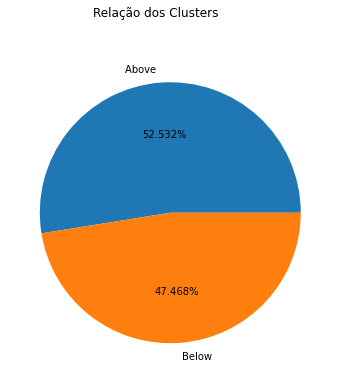

In [90]:
fig, axs = plt.subplots(figsize=(16, 6))
axs.pie(x = [above,below], labels = ["Above ","Below "],autopct='%1.3f%%')
fig.suptitle('Relação dos Clusters')
fig.savefig("Relação dos Clusters - Mediana.pdf")

In [127]:
Yb['Best_T'].value_counts().sort_index(ascending= False)

21    14
20    11
19     8
18    14
17     7
16    11
15     4
14     2
13     1
10     1
9      1
8      1
Name: Best_T, dtype: int64

In [128]:
lista_below = list(Yb['Best_T'].value_counts().sort_index(ascending= False).index)
q_below = list(Yb['Best_T'].value_counts().sort_index(ascending= False).values)

In [131]:
lista_below

[21, 20, 19, 18, 17, 16, 15, 14, 13, 10, 9, 8]

In [132]:
q_below

[14, 11, 8, 14, 7, 11, 4, 2, 1, 1, 1, 1]

In [153]:
represent17 = lista_below[-5:]
qrepresent17 = q_below[-5:]
qmais17 = sum(q_below[:7])

In [154]:
represent17 

[14, 13, 10, 9, 8]

In [155]:
qrepresent17

[2, 1, 1, 1, 1]

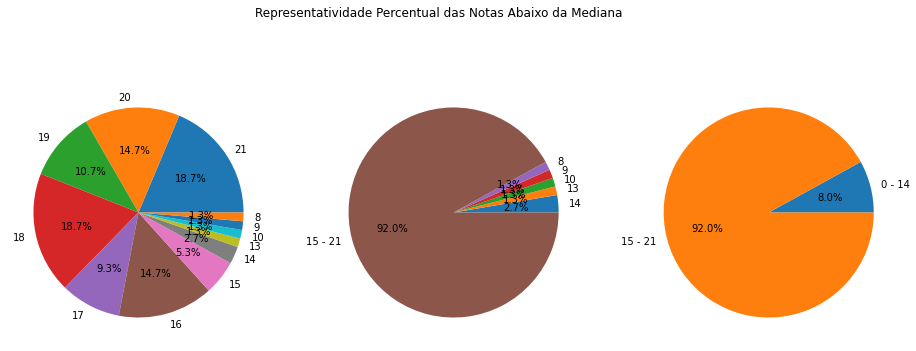

In [166]:
fig1, axs1 = plt.subplots(1,3,figsize=(16, 6))
axs1[0].pie(x = q_below, labels = lista_below,autopct='%1.1f%%')
axs1[1].pie(x =qrepresent17+[qmais17], labels=represent17+["15 - 21"],autopct='%1.1f%%')
axs1[2].pie(x = [sum(qrepresent17),qmais17], labels =["0 - 14", "15 - 21"],autopct='%1.1f%%')
fig1.suptitle('Representatividade Percentual das Notas Abaixo da Mediana')
fig1.savefig("Representatividade Percentual das Notas Abaixo da Mediana.pdf")


In [159]:
lista_above = list(Ya['Best_T'].value_counts().sort_index(ascending= False).index)
q_above = list(Ya['Best_T'].value_counts().sort_index(ascending= False).values)

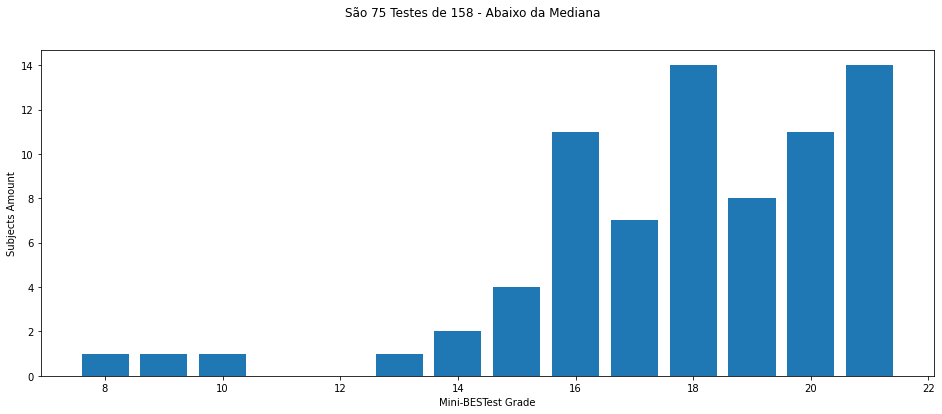

In [163]:
fig, axs = plt.subplots(figsize=(16, 6))
axs.bar(lista_below, q_below)
text0 = "São " + str(below)+ " Testes de 158 - Abaixo da Mediana"
fig.suptitle(text0)
axs.set_ylabel("Subjects Amount")
axs.set_xlabel("Mini-BESTest Grade")
fig.savefig("Histograma Best t abaixo da mediana.pdf")

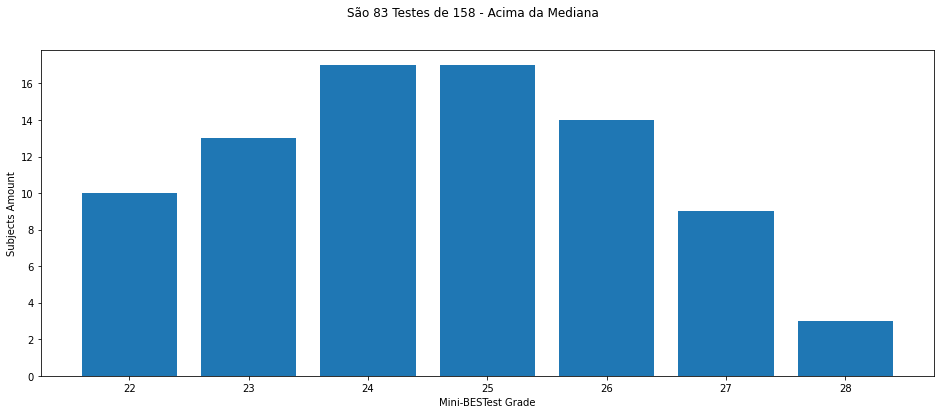

In [164]:
fig, axs = plt.subplots(figsize=(16, 6))
axs.bar(lista_above, q_above)
text1 = "São " + str(above)+ " Testes de 158 - Acima da Mediana"
fig.suptitle(text1)
axs.set_ylabel("Subjects Amount")
axs.set_xlabel("Mini-BESTest Grade")
fig.savefig("Histograma best t acima da mediana.pdf")